# 02: Exploratory Data Analysis (EDA)
**Project:** Ethiopia Financial Inclusion Impact Analysis  
**Goal:** Uncover historical trends and identify the "Inclusion Paradox."

### **What this notebook does:**
* **Trend Analysis:** Visualizes the growth of Mobile Money vs. traditional Bank Account ownership over the last decade.
* **The Inclusion Paradox:** Investigates the gap between "Mobile Access" (SIM cards) and "Financial Use" (Active accounts).
* **Demographic Slicing:** Breaks down inclusion rates by **Gender** and **Region** to identify underserved populations.
* **Baseline Reporting:** Generates the "Current State" charts (`01_inclusion_paradox.png`) used in the final dashboard.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'data', 'processed')
FIGURES_DIR = os.path.join(ROOT_DIR, 'reports', 'figures')

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(FIGURES_DIR, exist_ok=True)

PATH_REF = os.path.join(DATA_DIR, 'ethiopia_fi_cleaned.csv')

if os.path.exists(PATH_REF):
    df = pd.read_csv(PATH_REF)
    df['observation_date'] = pd.to_datetime(df['observation_date'])
    print("Data loaded successfully.")
else:
    print(f" Warning: File not found at {PATH_REF}")

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = [10, 6]

figures_path = os.path.join('reports', 'figures')
os.makedirs(figures_path, exist_ok=True)

Data loaded successfully.


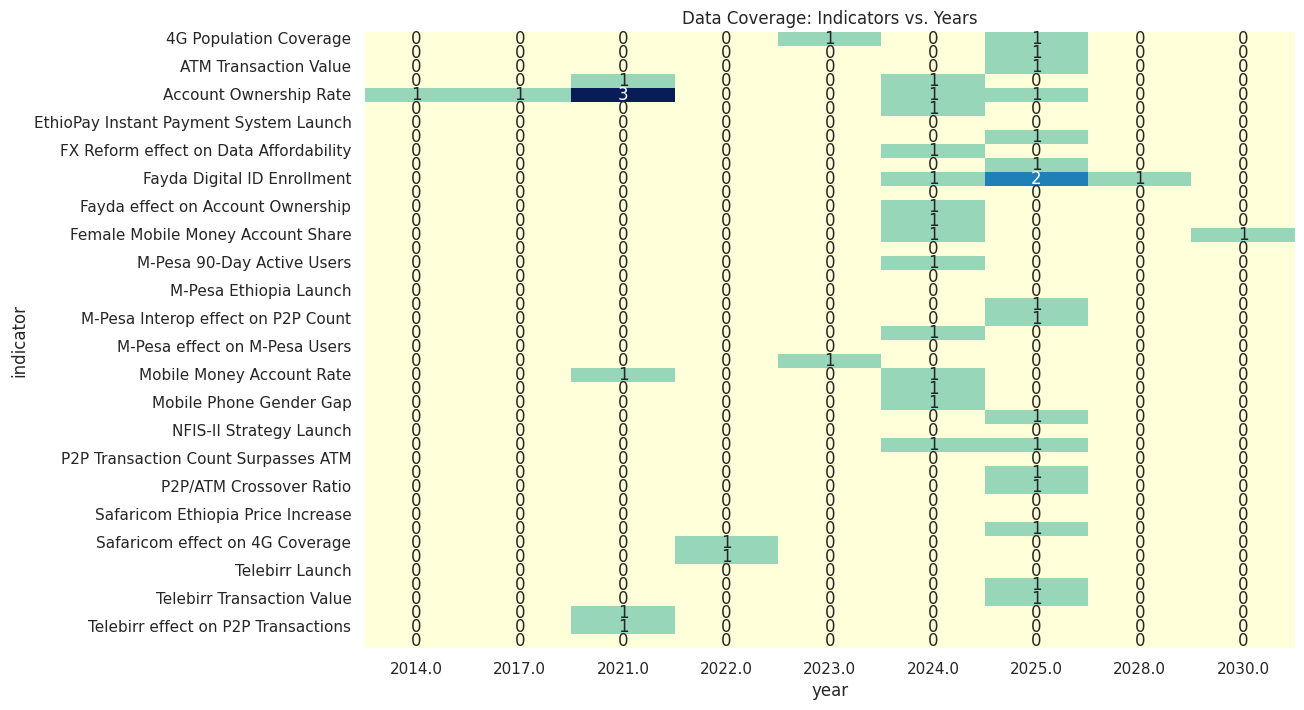

In [48]:
# Temporal Coverage Visualization (Task 2 Requirement)
# Create a year column from the observation_date
df['year'] = df['observation_date'].dt.year
coverage = df.pivot_table(index='indicator', columns='year', values='value_numeric', aggfunc='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(coverage, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Data Coverage: Indicators vs. Years")

file_name = 'data_coverage.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

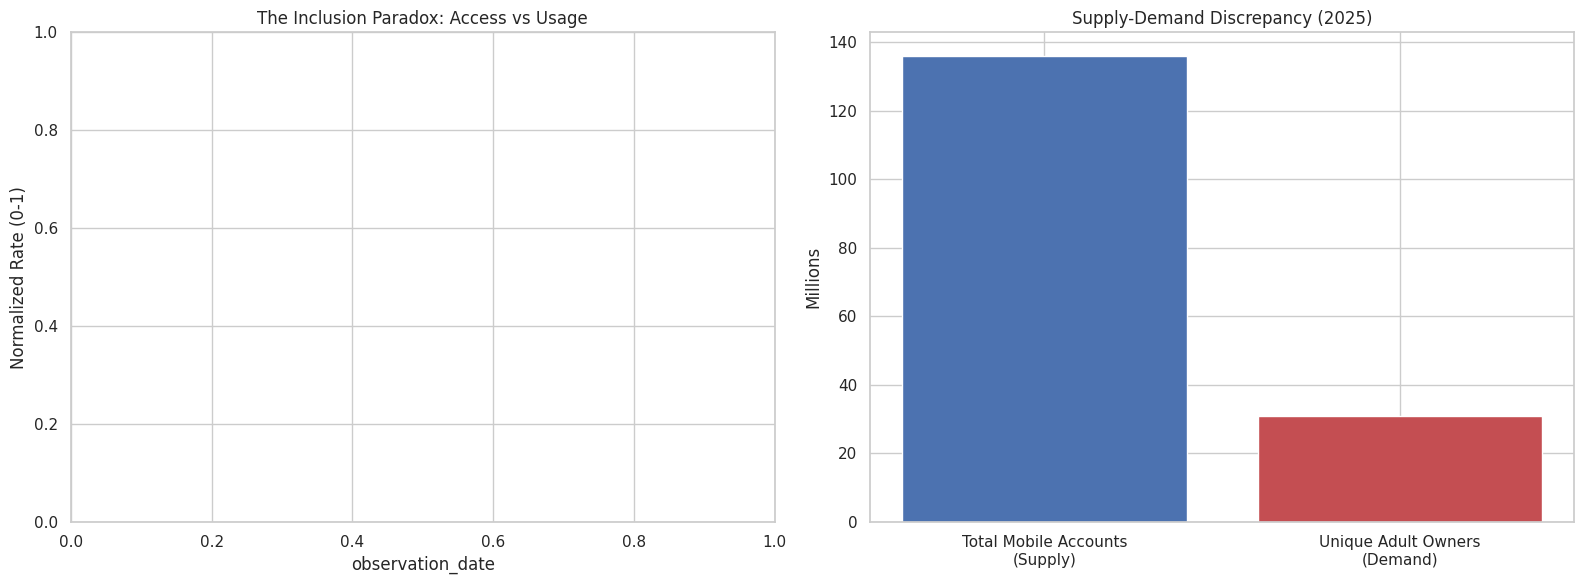

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Access vs Usage Trends
metrics = ['account_ownership', 'digital_payment_adoption']
plot_data = df[df['indicator_code'].isin(metrics)].sort_values('observation_date')
sns.lineplot(data=plot_data, x='observation_date', y='norm_val', hue='indicator', marker='o', ax=ax1)
ax1.set_title("The Inclusion Paradox: Access vs Usage")
ax1.set_ylabel("Normalized Rate (0-1)")

# Subplot 2: The Supply-Demand Gap (2025 Proxy)
gap_labels = ['Total Mobile Accounts\n(Supply)', 'Unique Adult Owners\n(Demand)']
gap_values = [136, 31] 
ax2.bar(gap_labels, gap_values, color=['#4C72B0', '#C44E52'])
ax2.set_title("Supply-Demand Discrepancy (2025)")
ax2.set_ylabel("Millions")

plt.tight_layout()

file_name = 'inclusion_paradox.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show() 

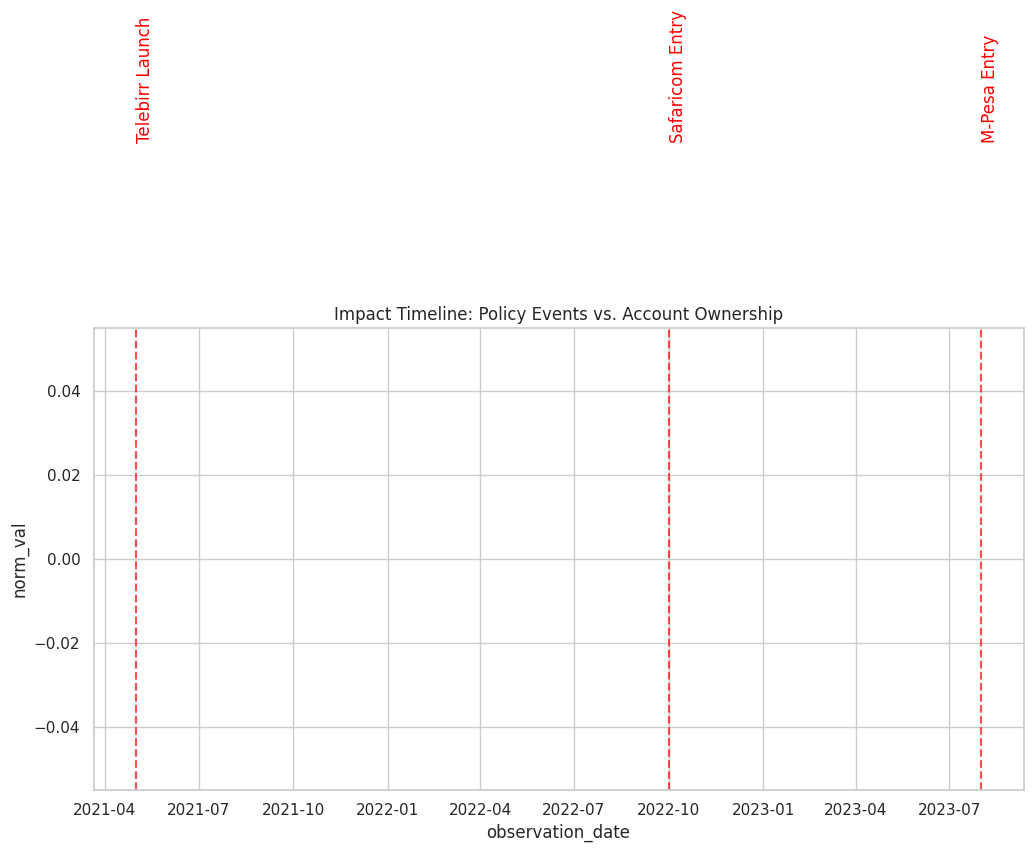

In [ ]:
# Event Timeline Overlay (Task 2 Requirement)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['indicator_code']=='account_ownership'], x='observation_date', y='norm_val', marker='o')

# Overlay Events
events = {
    '2021-05-01': 'Telebirr Launch',
    '2022-10-01': 'Safaricom Entry',
    '2023-08-01': 'M-Pesa Entry'
}
for date, label in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), 0.1, label, rotation=90, color='red')

plt.title("Impact Timeline: Policy Events vs. Account Ownership")

file_name = 'event_timeline.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_9887/4210751503.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_df, x='Segment', y='Ownership %', palette="magma")


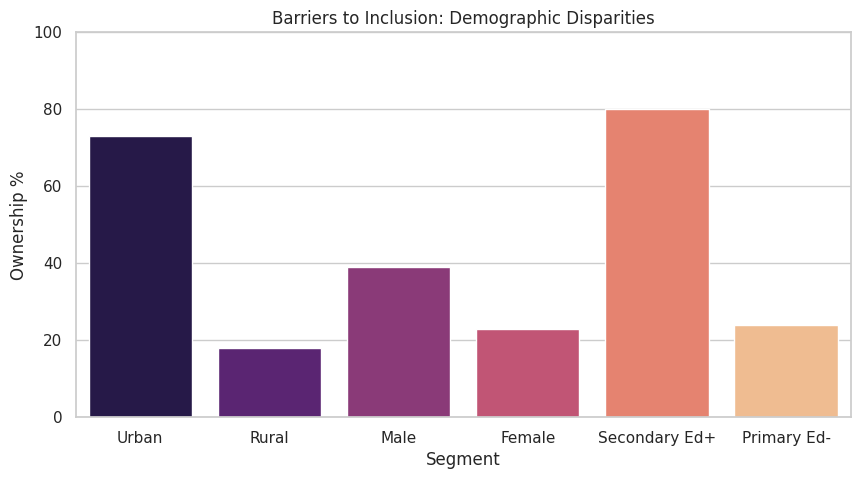

In [51]:
# Segment data (Findex 2024 Estimates)
segments = {
    'Segment': ['Urban', 'Rural', 'Male', 'Female', 'Secondary Ed+', 'Primary Ed-'],
    'Ownership %': [73, 18, 39, 23, 80, 24]
}
seg_df = pd.DataFrame(segments)

plt.figure(figsize=(10, 5))
sns.barplot(data=seg_df, x='Segment', y='Ownership %', palette="magma")
plt.title("Barriers to Inclusion: Demographic Disparities")
plt.ylim(0, 100)

file_name = 'demographic_divide.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

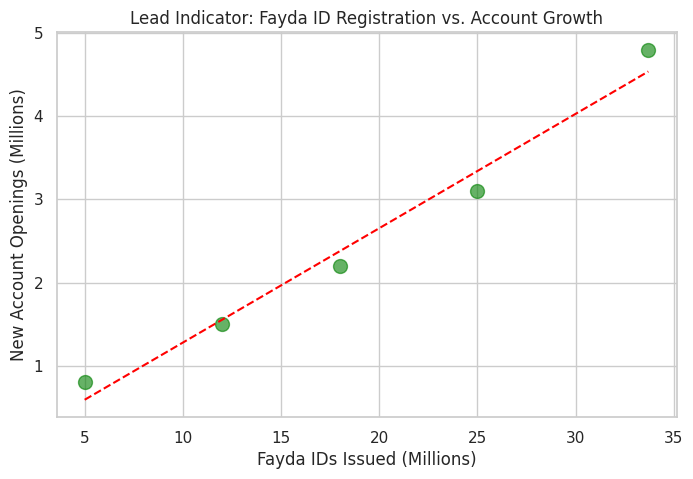

In [52]:
# Correlation between ID rollout and New Accounts
fayda_ids = [5, 12, 18, 25, 33.7] # Millions
bank_accs = [0.8, 1.5, 2.2, 3.1, 4.8] # New Millions

plt.figure(figsize=(8, 5))
plt.scatter(fayda_ids, bank_accs, s=100, color='green', alpha=0.6)
plt.plot(np.unique(fayda_ids), np.poly1d(np.polyfit(fayda_ids, bank_accs, 1))(np.unique(fayda_ids)), color='red', linestyle='--')
plt.title("Lead Indicator: Fayda ID Registration vs. Account Growth")
plt.xlabel("Fayda IDs Issued (Millions)")
plt.ylabel("New Account Openings (Millions)")

save_name = os.path.join('03_fayda_lead_indicator.png')
file_name = 'fayda_lead_indicator.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

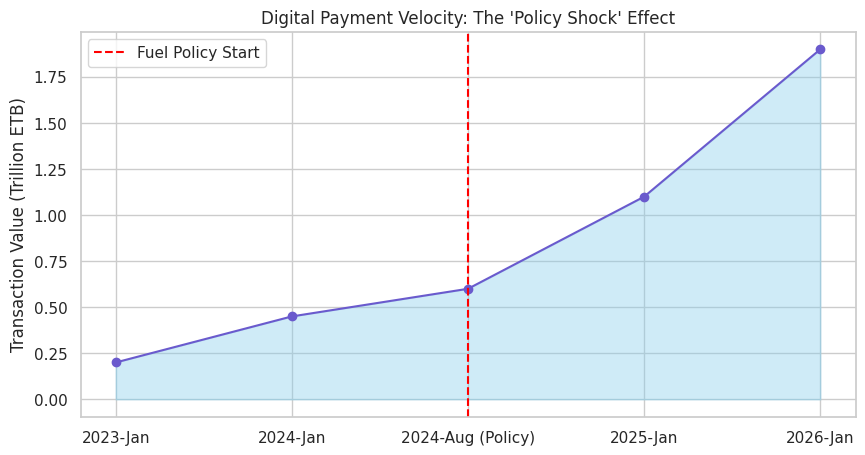

In [53]:
# Usage Velocity before and after Fuel Digitization
dates = ['2023-Jan', '2024-Jan', '2024-Aug (Policy)', '2025-Jan', '2026-Jan']
values = [0.2, 0.45, 0.6, 1.1, 1.9] 

plt.figure(figsize=(10, 5))
plt.fill_between(dates, values, color="skyblue", alpha=0.4)
plt.plot(dates, values, marker='o', color="Slateblue")
plt.axvline(x=2, color='red', linestyle='--', label="Fuel Policy Start")
plt.title("Digital Payment Velocity: The 'Policy Shock' Effect")
plt.ylabel("Transaction Value (Trillion ETB)")
plt.legend()

file_name = 'policy_shock_velocity.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

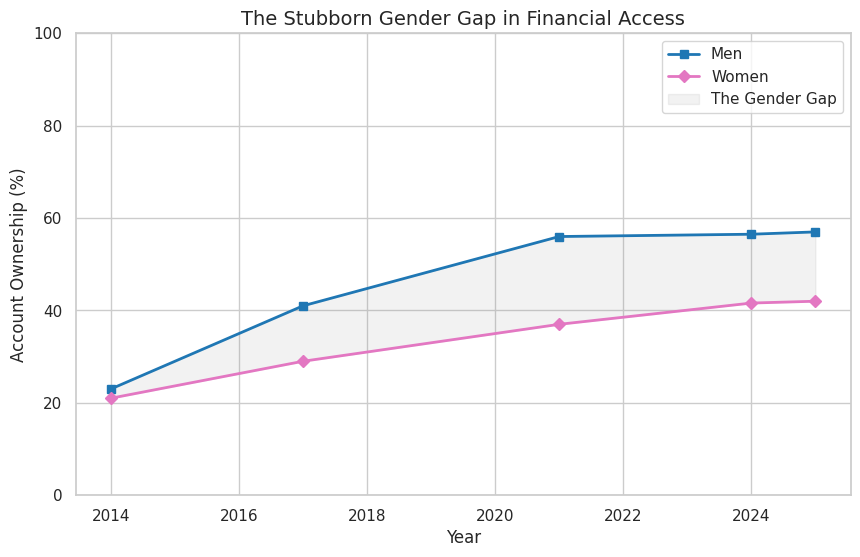

In [54]:
# The Gender Gap (2014 - 2025)
# Data sources: World Bank Findex & NBE Gender Data Landscape 2025
years_gender = [2014, 2017, 2021, 2024, 2025]
men_access = [23, 41, 56, 56.5, 57]
women_access = [21, 29, 37, 41.6, 42]

plt.figure(figsize=(10, 6))
plt.plot(years_gender, men_access, label='Men', marker='s', color='#1f77b4', linewidth=2)
plt.plot(years_gender, women_access, label='Women', marker='D', color='#e377c2', linewidth=2)

plt.fill_between(years_gender, women_access, men_access, color='gray', alpha=0.1, label='The Gender Gap')

plt.title("The Stubborn Gender Gap in Financial Access", fontsize=14)
plt.ylabel("Account Ownership (%)")
plt.xlabel("Year")
plt.legend()
plt.ylim(0, 100)


file_name = 'gender_gap_trend.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

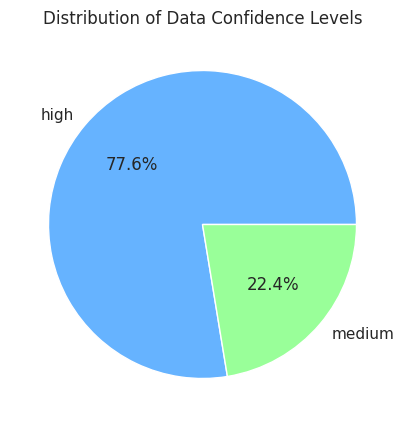

In [ ]:
# Data Quality Assessment 
plt.figure(figsize=(8, 5))
df['confidence'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Distribution of Data Confidence Levels")
plt.ylabel('')
file_name = 'data_quality.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()